In [1]:
import numpy as np
from scipy.linalg import eig
# Question 1, Part 1
# Define the matrix M
M = np.array([[0,0,1/2,0],
              [1/3,0,0,1/2],
             [1/3,1/2,0,1/2],
             [1/3,1/2,1/2,0]])

# Compute eigenvalues and eigenvectors
eigenvalues, eigenvectors = eig(M)

# Find the index of the dominant eigenvalue (largest absolute value)
dominant_eigenvalue_index = np.argmax(np.abs(eigenvalues))

# Extract the dominant eigenvector
dominant_eigenvector = eigenvectors[:, dominant_eigenvalue_index]

print("Dominant Eigenvector:", dominant_eigenvector)

Dominant Eigenvector: [0.30460385+0.j 0.40613847+0.j 0.6092077 +0.j 0.6092077 +0.j]


In [2]:
# Question 1, Part 2
v = np.ones(4)

for k in range(1000):
    v_new = M @ v
    if np.linalg.norm(v_new - v) < 1e-8:
        break
    v = v_new

#Question 1, Part 3
#normalize the vector
v= v / v.sum()

print("PageRank:", v)
print("After normalizing the vector, each number represents ")
print("the long-run probability of being on page (1,2,3 or 4)")

PageRank: [0.15789474 0.21052632 0.31578947 0.31578947]
After normalizing the vector, each number represents 
the long-run probability of being on page (1,2,3 or 4)


In [3]:
# Question 1, Part 4

# Pages 3 and 4 have the highest PageRank scores because they receive the most incoming
# probability from other pages, with page 2 being next and page 1 being the least
print("Pages 3 and 4 have the highest PageRank scores because")
print("they receive the most incoming probability from other pages,")
print("with page 2 being next and page 1 being the least.")

Pages 3 and 4 have the highest PageRank scores because
they receive the most incoming probability from other pages,
with page 2 being next and page 1 being the least.


In [4]:
# Question 2, Part 1

import pandas as pd

df = pd.read_csv("data.csv")
#print(df.shape)
data = df.to_numpy()
cov_matrix = np.cov(data, rowvar=False)
print("covariance matrix: \n", cov_matrix)

covariance matrix: 
 [[1.02608749 0.11769063]
 [0.11769063 1.08134929]]


In [5]:
# Question 2, Part 2
from scipy.linalg import eigh

eigenvalues, eigenvectors = eigh(cov_matrix)

print("Eigenvalues:\n", eigenvalues)
print("Eigenvectors (columns are eigenvectors):\n", eigenvectors)

Eigenvalues:
 [0.93282774 1.17460905]
Eigenvectors (columns are eigenvectors):
 [[-0.78376051  0.62106317]
 [ 0.62106317  0.78376051]]


In [6]:
# Question 2, Part 3
print("PC1 is the eigenvector that corresponds to the larger eigenvalue, which is [.621,.784]")
print("PC2 is the other eigenvector [-.784,.621] ")
print("The amount of variance explained by each of the PCs is the ratio")
print("of the eigenvalue / (sum of the two eigenvalues)")
print("so in this case .9328+1.1746=2.1074 => PC1 1.1746/2.1074 ~ 55.7% of variance explained")
print("PC2 => ~44.3% variance explained")

PC1 is the eigenvector that corresponds to the larger eigenvalue, which is [.621,.784]
PC2 is the other eigenvector [-.784,.621] 
The amount of variance explained by each of the PCs is the ratio
of the eigenvalue / (sum of the two eigenvalues)
so in this case .9328+1.1746=2.1074 => PC1 1.1746/2.1074 ~ 55.7% of variance explained
PC2 => ~44.3% variance explained


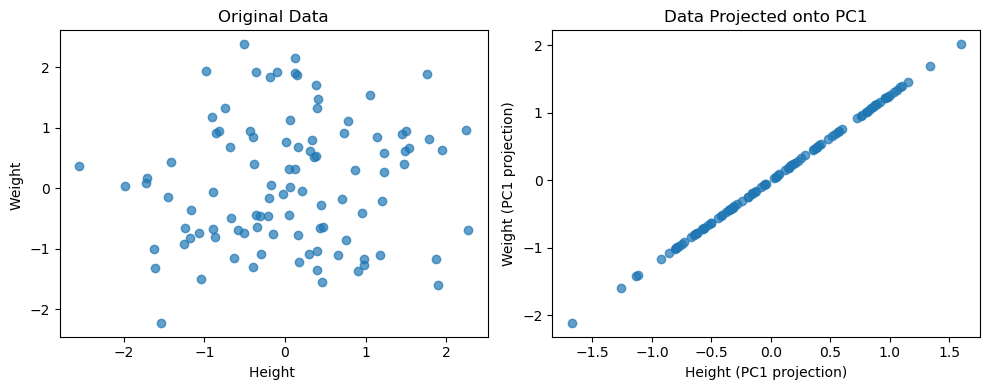

In [7]:
# Question 2, Part 4

pc1= eigenvectors[:,1]

# project to 1D
result_1d = data @ pc1
# project to graph
result_for_graph = np.outer(result_1d,pc1)

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 4))

# plot original data
plt.subplot(1, 2, 1)
plt.scatter(data[:, 0], data[:, 1], alpha=0.7)
plt.xlabel("Height ")
plt.ylabel("Weight ")
plt.title("Original Data")

# Right: data projected onto PC1 (shown back in 2D)
plt.subplot(1, 2, 2)
plt.scatter(result_for_graph[:, 0], result_for_graph[:, 1], alpha=0.7)
plt.xlabel("Height (PC1 projection)")
plt.ylabel("Weight (PC1 projection)")
plt.title("Data Projected onto PC1")

plt.tight_layout()
plt.show()

In [8]:
# Question 3, Part 1
X = np.array([[2100,3,20],
              [2500,4,15],
              [1800,2,30],
              [2200,3,25]])

y=np.array([460,540,330,400])

print("X matrix: \n",X)
print("y target vector: \n",y)

X matrix: 
 [[2100    3   20]
 [2500    4   15]
 [1800    2   30]
 [2200    3   25]]
y target vector: 
 [460 540 330 400]


In [9]:
#Question 3, Part 2
from scipy.linalg import lstsq

# Solve the least-squares problem
beta, residuals, rank, s = lstsq(X, y)

print("Beta coefficients", beta)

Beta coefficients [    3.2875 -1628.75     -77.75  ]


In [10]:
#Question 3, Part 3
beta = np.array([3.2875,-1628.75,-77.75])
observed = np.array([2400,3,20])
# dot product
lstsq_predicted_price = observed @ beta

print("predicted price (in $1000s): ", lstsq_predicted_price)

predicted price (in $1000s):  1448.75


In [11]:
# Question 3, Part 4

print("Least-squares finds the best possible coefficients by making the overall\n",
      "prediction error as small as it can. Our system has 4 equations and only\n",
      "3 unknowns, so there is no exact solution. Least-squares gives us the\n",
      "closest fit.\n",
      "On the other hand, scipy.linalg.solve only works when the system is square\n",
      "and has an exact solution. Since our X matrix is 4x3, 'solve' can't be used\n",
      "here. That's why least-squares is the right method for this problem.\n")

Least-squares finds the best possible coefficients by making the overall
 prediction error as small as it can. Our system has 4 equations and only
 3 unknowns, so there is no exact solution. Least-squares gives us the
 closest fit.
 On the other hand, scipy.linalg.solve only works when the system is square
 and has an exact solution. Since our X matrix is 4x3, 'solve' can't be used
 here. That's why least-squares is the right method for this problem.



In [12]:
# Question 4, Part 1

def loss(X,A):
    return 0.5 * np.sum((X-A)**2)

In [13]:
# Question 4, Part 2
#∇f(X) = X − A

In [14]:
# Question 4, Part 3
from scipy.optimize import minimize

#create matrices
m, n = 100, 50
A = np.random.randn(m, n)
X = np.random.randn(m, n)

# flatten X to feed into minimize
x0 = X.flatten()

# loss function for minimize
def f(x):
    Xmat = x.reshape(m, n)
    return 0.5 * np.sum((Xmat - A)**2)

# gradient = X - A
def grad(x):
    Xmat = x.reshape(m, n)
    return (Xmat - A).flatten()

# run minimize (basically gradient descent)
res = minimize(f, x0, jac=grad, method='CG', options={'maxiter':1000})

X_final = res.x.reshape(m, n)

print("final loss:", res.fun)

final loss: 3.0530351069921224e-32


final loss: 3.5615742588324385e-06


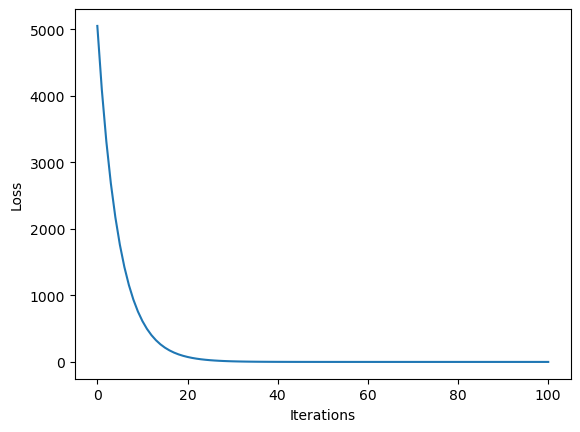

In [15]:
# Question 4, Parts 4-6
#create A and X
m,n=100,50
A = np.random.randn(m,n)
X = np.random.randn(m,n)

def loss(X,A):
    return 0.5 * np.sum((X-A)**2)

lr = 0.1 # learning rate
tol = 1e-6 # threshold
losses = []

for i in range(1000):
    L = loss(X, A)
    losses.append(L)

    if i > 0 and abs(losses[-1] - losses[-2]) < tol:
        break

    grad = X - A
    X = X - lr * grad

print("final loss:", losses[-1])

plt.plot(losses)
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.show()